In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

In [45]:
df = pd.read_csv('CleanedSeattleData.csv')

X = df[['JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]  # your features
y = df['INJURY_BINARY'] = df['SEVERITYCODE'].apply(lambda x: 1 if x > 1 else 0)

# Splitting data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Using grid search with cross validation to find best max_depth for decision tree
param_grid = {'max_depth': range(1, 15)} # Range found by testing random values
tree = DecisionTreeClassifier(random_state=0)
grid = GridSearchCV(tree, param_grid, cv=10, scoring='accuracy') 
grid.fit(X_train, y_train)

# Metrics for best parameter
print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.5f}".format(grid.best_score_))

# Evaluating on the test set using the optimal max_depth
best_tree = grid.best_estimator_
y_pred = best_tree.predict(X_test)
print("Test set accuracy: {:.5f}".format(accuracy_score(y_test, y_pred)))

# Metrics
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# print(best_tree.tree_.max_depth)


Best parameters: {'max_depth': 7}
Best cross-validation score: 0.65778
Test set accuracy: 0.65682


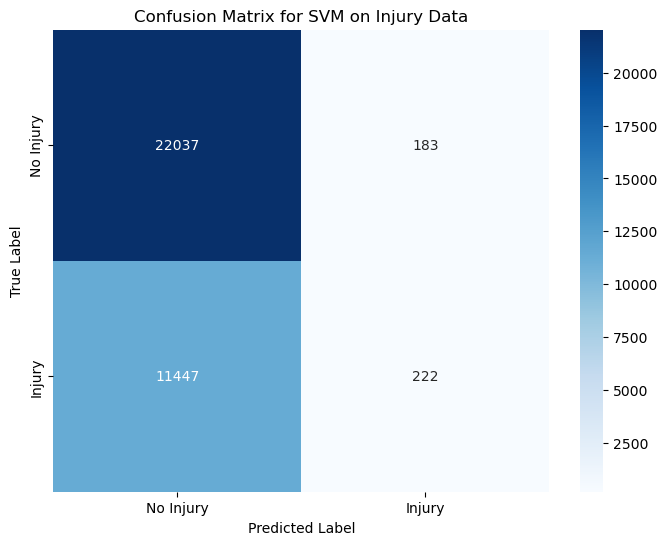

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.title('Confusion Matrix for SVM on Injury Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()